# DSCI 571 Lecture 1

## Where we are at:

![](https://ubc-mds.github.io/img/Course-Schedule-image.jpg)

### Outline of this course:

- **first half**: optimization and derivatives
- **second half**: "deep learning"
  - speaking of which, there's a [relevant talk](https://www.cs.ubc.ca/event/2017/02/tensorflow-system-large-scale-machine-learning-talk-derek-murray-google) tomorrow at 4pm in [CHBE](http://www.maps.ubc.ca/PROD/index_detail.php?locat1=300) Room 101: "TensorFlow: a system for large-scale machine learning"


### Skills from other courses we'll drawn on:

- DSCI 571: big ideas in machine learning like underfitting and overfitting, regularization.
- DSCI 525: we will be deploying some models on Amazon's EC2 in lab 2.
- DSCI 561/562: we'll be doing some regression! But departing from linear models.
- probably all kinds of other things I'm forgetting.

## Optimization: introduction

#### definition

- An "optimization problem" refers to maximizing or minimizing a function. 
- There are many, many types of optimization problems.

$$ \displaystyle \min_x \, (x-a)^2+b $$

Interpretation: minimize the function $f(x)=(x-a)^2+b$ with respect to $x$ and return the minimum value $x$. So in this case 


$$f^\star = \displaystyle \min_x \, (x-a)^2+b $$

#### minimizer vs. minimum

- Sometimes you are also interested in the **minimizer** rather than the **minimum** (plural **minima**). This is written as

$$x^\star = \displaystyle \arg \min_x \, (x-a)^2+b $$

#### maximization vs. minimization

The same goes for **maximizer** and **maximum** and $f^* = \max\,f(x)$ and $x^* = \arg \max\,f(x)$.

- The thing being maximized/minimized is called the **objective function**. Sometimes (primarily when minimizing) it's also called the **loss function** or **cost function**.

- Sometimes the result is not defined:

$$ \displaystyle \max_x \, (x-a)^2+b $$

is $\infty$. And

$$ \displaystyle \arg \max_x \, (x-a)^2+b $$

is undefined. 

#### dimensionalities

- The function you are optimizing should be a scalar-valued function, but the inputs need not be scalar-valued. For example:

$$ \min_\mathbf{x} ||\mathbf{x}||^2_2 $$

is a reasonable thing to write. 

#### Continuous vs. discrete

- Some optimization problems are **continuous** and others are **discrete**. In the above we've been assuming continuous variables. But we saw discrete optimization a lot in DSCI 512. Examples of discrete optimization:

  - dynamic programming (we did seam carving, scheduling, etc.)
  - finding the shortest path between two people in a social network (in fact here the output is also discrete)
  
- We've also seen plenty of continuous optmization:

  - maximum likelihood and MAP
  - all the regression in DSCI 561 and 562
  - in fact, other than training the models themselves, we've also talked about _hyperparameter optimization_

classification in DSCI 571 a mix of continuous and discrete



#### Domains

- An optimization problem may come with a domain. In the examples above, we've assumed $x\in\mathbb{R}$. But sometimes we restrict ourselves. For example $x\geq 0$, etc. 

- These are sometimes also called "bounds". Like $0\leq x \leq 1$ means $x$ is bounded below by 0 and bounded above by 1.

- Note: you'll always see things like $x\geq 0$ and never $x>0$. Why? Consider this

$$\displaystyle \min_x \, x \quad \textrm{s.t.} \quad x>0$$

What's the solution?

  - BTW "s.t." means "such that". Or maybe "subject to". Depending on your mood.

- Note: you can think of discrete optimization as just a restriction on the domain of optimization, as in $x_{ij}\in\{0,1\}$ for seam carving. 
  - By the way, $\{0,1\}$ means "0 or 1" whereas $[0,1]$ means "between 0 and 1, inclusive". $(0,1)$ means "between 0 and 1, exclusive", but this one is less important. 
  
#### Constraints: introduction

- An optimization problem may come with one or more **constraints** (but, for the purposes of this course, only one objective! If you've seen pareto fronts in economics class, that's a multi-objective situation).

- Example:

$$ \displaystyle \min_x (x-a)^2+b \quad \textrm{s.t.} \quad \sin(x) \leq 0.5$$

- If you want, you can think of bounds/domains as a special case of constraints. But I wouldn't take this too far. From a computational point of view, this doesn't always make sense. For example you'd use totally different methods for discrete and continuous optimization, so it's a mistake to think of discrete optimization as "continuous optimization with a constraint". For just bounds it's OK though.

- The above is called an **inequality constraint**. Another type of constraint an an **equality constraint**. For example: 


$$ \displaystyle \min_x (x-a)^2+b \quad \textrm{s.t.} \quad \sin(x) = 0.5$$

These are very different beasts!!!! Roughly speaking,

- equality constraints tend to reduce the dimensionality of the search space (restricting us to a subspace)
- inequality constraints typically do not reduce the dimensionality but just cut the space "in half"



#### Constraints: feasibility

- Not all constraints change the solution. For example, the constraint $\sin(x) \leq 5$. This is a vacuous constraint... it is true for any $x\in\mathbb{R}$.

- Some constraints cannot be satisfied. In this case we say the problem is **infeasible**. For example $\sin(x)\geq 5$.  

- Sometimes a single constraint on its own isn't enough to make a problem infeasible, but their combination does so. For example having two constraints $x\geq 5$ and $x \leq 3$. 

#### Constraints: active vs. not active

- Constraints may or may not be **active** at the solution. This is different from whether or not that are satisfiable (above). Example:

$$ \min_x \; x^2 $$
$$ \textrm{s.t.} $$
$$ x^4 \leq 3 $$
$$ |x| \geq 1 $$

- the unconstrained minimizer is $x=0$. The constrained minimizer is $x=1$. So we say the second constraint is active at the solution. However, the first constraint is not active; if you removed it, the solution would be unchanged.

- in my mind, an active constraint is like a wall that I run into. I'd like to go farther down the hill but I can't.

- key point: the objective function determines which of the constraints are active.


Demo:  $\min_x \; \sin(x) \; \textrm{s.t.} \sin(x)\geq 0.5$

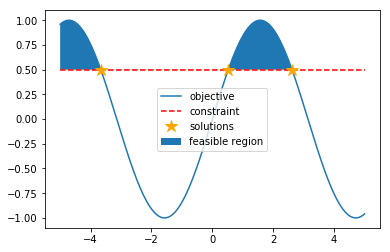

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

x = np.linspace(-5,5,1000)
y = np.sin(x)
plt.plot(x, y, label="objective")
plt.plot(x, 0*x+0.5, color="r", linestyle="--", label="constraint")
plt.fill_between(x[y>=0.5], 0.5, y[y>=0.5], label="feasible region")
plt.plot([-7*np.pi/6, np.pi/6, 5*np.pi/6], 0.5+np.zeros(3), '*', color="orange", markersize=12, label="solutions")
plt.legend()
plt.show()

#### Convex functions

- There is a mathematical definition. You can [read about it here](https://en.wikipedia.org/wiki/Convex_function).

- For our purposes, the key is for convex functions, a local minimum is also a global minimum.

- (optional note) convex --> all local minima are global minima; but non-convex -/-> there exists local minima that are not global minima

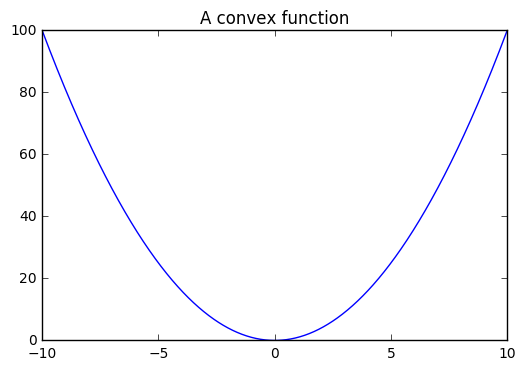

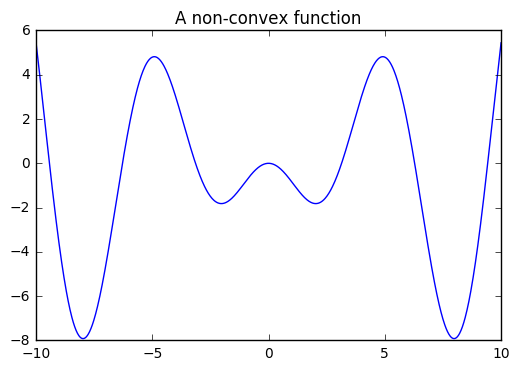

In [10]:
x = np.linspace(-10,10,1000)
plt.plot(x,x**2)
plt.title("A convex function")
plt.show()

plt.figure()
plt.plot(x, -x*np.sin(x))
plt.title("A non-convex function")
plt.show()

#### why do we care about convexity

- from a machine learning point of view, optimization is often the hard part and very often the time-consuming part. 
  - many losses you've seen so far are convex (SVM, least squares), 
  - the loss functions we'll discuss later in this course are non-convex
  - robust regression can also be non-convex
- exceptions:
  - in Bayesian methods (see DSCI 553) you sometimes spend your time on MCMC instead of optimization
  - some methods don't involve minimization of a loss function, like kNN
    - although even there you need to find the nearest neighbours which is...
  - in some cases you can find the solution in closed form (least squares) so you might not be thinking about optimization

#### How do we solve (continuous) optimization problems?

- From calculus we were told that to find the min/max of a function, take the derivative and set to 0
- So what's the big deal?
- The big deal is that "derivative=0" is an equation **we cannot solve most equations**!!! 
 - (I feel like high school gives the wrong impression abouve this...)

Here's one: 

$$\sin(\cos(x))+999\log{x}=\sqrt{x}$$

I just made that up and it might to make any sense, but the point is for it to look weird. Can we solve this? No. We cannot solve equations in closed form, in general. This is true for one variable ($x\in\mathbb{R}$) and more than one variable ($x \in \mathbb{R}^d,\;d>1$). So we solve equations with _iterative methods_. (Remember Newton's method?) 

There's an entire field of study related to different such methods. Different methods work well for different classes of functions. And even "well" needs to be defined carefully, but roughly it means "gets to a/the solution quickly".



So, yes, there is a mapping from optimization to solving equations, but we're not done because

1. solving equations is hard
2. even if we find points where the derivative (gradient) is zero, if the loss is non-convex we need to worry about local minima, saddle points (maxima are less of a problem)



#### What makes an optimization problem "hard"?

This is a very difficult question. I can't necessarily do it justice but I will try.

VERY roughly speaking, we have, from least difficult to most difficult:

VERY roughly speaking, we have, from least difficult to most difficult:

1. Problems that can be solved in closed form (OLS... and not much else)
2. Problems that are convex (e.g. logistic regression, SVM)
3. Problems that are not convex and have local minima (e.g. neural networks, coming later in this course)


More reasons why optimization is hard...

- Discrete optimization tends to be even harder than continuous

  - discrete optimization with $N$ binary variables $x_i\in\{0,1\}$, $i=1,\ldots,N$ often takes $\mathcal{O}(2^N)$ time in the worst case (or something bad like that). In other words, the worst case behaves like you have to try out all possibilities. 
  
- If you are minimizing a non-convex continuous function, you may get "stuck" in a local minimum. **global optimization** refers to the (very ambitious) task of finding a global optimum. Sometimes we settle for just a **local** search.

- Sometimes the function you are evaluating is "expensive"; the most common expense is time. If $f(\mathbf{x})$ takes an hour to evaluate for a given $\mathbf{x}$ then your life is a lot harder. 

- Availability of "extra information" helps. Most notably the derivative (Lecture 2) but also 2nd derivatives, smoothness properties, etc etc.

- The poorly-defined concept of **structure** can help you solve the problem. DSCI 512 Lab 4 on seam carving was all about this. The more structure we took advantage of, the faster our algorithm. In continuous optimization, we see the same type of thing. For example if the objective and constraints are linear, we can solve the problem much faster. 

- If you're really unlucky, you may only be able to perform _noisy_ evaluations of your objective; this comes up in e.g. hyperparameter optimization.

- Higher dimension problems tend to be harder. The "volume" to explore grows exponentially in $d$.

- Smoothness makes things easier. More local minima makes it harder. Consider the function below. This is not fun. Now imagine this in 100 dimensions with the spike hidden somewhere in 100-dimensional space. Yikes.

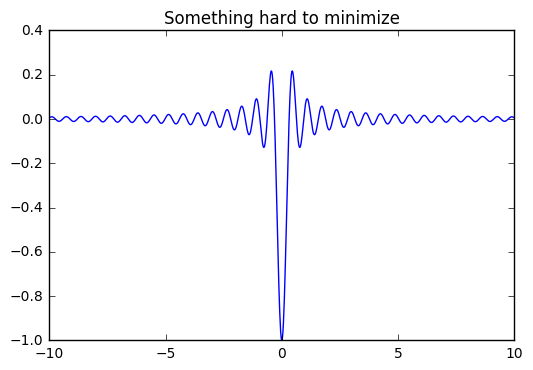

In [9]:
plt.figure()
plt.plot(x, -np.sin(10*x)/(10*x))
plt.title("Something hard to minimize")
plt.show()

## What else makes ML hard?

- amounts of data

- quality of data (high noise levels, heteroskedasticity, missing data)

- structure to your problem

  - time series (see DSCI 572)
  - your input may be a special data structure like a graph (eg social networks)

- your utility function may be hard to elicit 
 
- your inputs may not be informative about your outputs (you collected the wrong data)

- your model might be wrong. this could cause underfitting.

- overfitting.

- troubleshooting: it can be hard to know why a method is not working

- numerical errors (see Lecture 3 of this course)

- computational considerations

  - often training is slower than testing
    - training can take weeks, months
    - need to move to specialized hardware like GPUs (coming later in this course)
  - but sometimes even testing time is a problem
    - e.g. classifying all of YouTube
    - real-time applications (e.g. Siri)





















